# K-Nearest Neighbors

    K-Nearest Neighbours é um algoritmo de aprendizado supervisionado. Onde os dados são treinados com pontos de dados correspondentes à sua classificação. Uma vez que um ponto é previsto, ele leva em consideração os pontos 'K' mais próximos para determinar sua classificação.

<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

    Nesse caso, temos pontos de dados das classes A e B. Queremos prever o que a estrela é. Se considerarmos um valor k de 3 (3 pontos de dados mais próximos), obteremos uma previsão da Classe B. No entanto, se considerarmos um valor k de 6, obteremos uma previsão da Classe A.

    Nesse sentido, é importante considerar o valor de k. Mas, esperançosamente, a partir deste diagrama, você deve ter uma noção do que é o algoritmo K-Nearest Neighbors. Ele considera o 'K' vizinhos mais próximos quando prevê a classificação do ponto de teste.

# Imports

In [32]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns

%matplotlib inline

# Sobre o conjunto de dados

    Imagine que um provedor de telecomunicações tenha segmentado sua base de clientes por padrões de uso de serviço, categorizando os clientes em quatro grupos. Se dados demográficos puderem ser usados para prever a associação ao grupo, a empresa poderá personalizar ofertas para possíveis clientes individuais. É um problema de classificação. Ou seja, dado o conjunto de dados, com rótulos predefinidos, precisamos construir um modelo a ser usado para prever a classe de um caso novo ou desconhecido.

    O exemplo se concentra no uso de dados demográficos, como região, idade e conjugal, para prever padrões de uso.

    O campo de destino, chamado custcat, possui quatro valores possíveis que correspondem aos quatro grupos de clientes, como a seguir: 1- Serviço básico 2- E-Service 3- Serviço Plus 4- Serviço total

    Nosso objetivo é construir um classificador, para prever a classe de casos desconhecidos. Usaremos um tipo específico de classificação chamado K vizinho mais próximo.

In [4]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-04-16 16:26:00--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolvendo s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Conectando-se a s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 37048 (36K) [text/csv]
Salvando em: “teleCust1000t.csv”

teleCust1000t.csv   100%[===================>]  36,18K  42,6KB/s    em 0,8s    

2020-04-16 16:26:02 (42,6 KB/s) - “teleCust1000t.csv” salvo [37048/37048]



# Download Data

In [5]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [30]:
print(len(df))

1000


# Visualização e Análise

    Visualização da quantidade de cada classe no conjunto de dados

In [6]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

.value_counts() Retorne uma série contendo contagens de valores exclusivos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7602d8710>]],
      dtype=object)

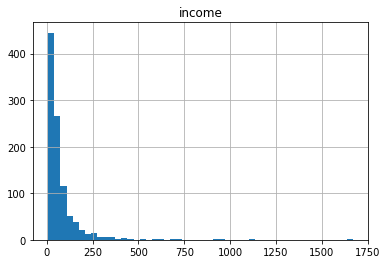

In [7]:
df.hist(column='income', bins=50)

.hist() Um histograma do DataFrame, uma representação da distribuição de dados.

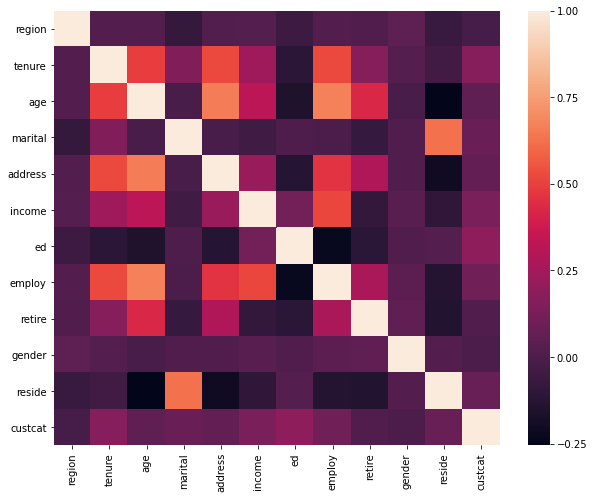

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr());

# Conjunto de características

In [8]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [9]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [10]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

# Normalização dos Dados

    A padronização de dados fornece aos dados zero média e variação de unidade, é uma boa prática, especialmente para algoritmos como o KNN, que se baseia na distância dos casos:

.StandardScaler() - Padronize recursos removendo a média e o dimensionamento para a variação da unidade

.transform(X.astype(float)) - Converter a matrix para um tipo especifico

In [11]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

# Treino Teste Split

    Precisão fora da amostra é a porcentagem de previsões corretas que o modelo faz nos dados em que o modelo NÃO foi treinado. Fazer um treino e teste no mesmo conjunto de dados provavelmente terá baixa precisão fora da amostra, devido à probabilidade de excesso de ajuste.

    É importante que nossos modelos tenham uma precisão alta fora da amostra, porque o objetivo de qualquer modelo, é claro, é fazer previsões corretas sobre dados desconhecidos. Então, como podemos melhorar a precisão fora da amostra? Uma maneira é usar uma abordagem de avaliação chamada Train / Test Split. A divisão Train / Test envolve dividir o conjunto de dados em conjuntos de treinamento e teste, respectivamente, que são mutuamente exclusivos. Depois disso, você treina com o conjunto de treinamento e testa com o conjunto de testes.

    Isso fornecerá uma avaliação mais precisa da precisão fora da amostra, porque o conjunto de dados de teste não faz parte do conjunto de dados que foi usado para treinar os dados. É mais realista para problemas do mundo real.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

# Classificação

# K Nearest Neighbor (KNN)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

    Treinamento

In [35]:
k = 38

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=38, p=2,
                     weights='uniform')

    Predição

In [36]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 1, 2, 4, 4])

    Acurácia

In [37]:
from sklearn import metrics

print("Treino Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Teste Accuracy: ", metrics.accuracy_score(y_test, yhat))

Treino Accuracy:  0.4275
Teste Accuracy:  0.41


    E quanto a outro K?
    K em KNN, é o número de vizinhos mais próximos a serem examinados. É suposto ser especificado pelo usuário. Então, como podemos escolher o valor certo para K? A solução geral é reservar uma parte dos seus dados para testar a precisão do modelo. Em seguida, escolha k = 1, use a parte de treinamento para modelagem e calcule a precisão da previsão usando todas as amostras em seu conjunto de testes. Repita esse processo, aumentando ok, e veja qual k é o melhor para o seu modelo.

    Podemos calcular a precisão do KNN para diferentes Ks.

In [41]:
Ks = 40
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks): 
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

    Precisão do modelo de plotagem para número diferente de vizinhos

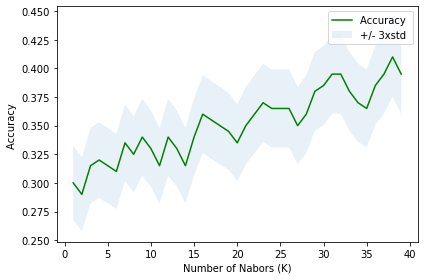

In [42]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()

In [43]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.41 with k= 38
